In [161]:
import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import matplotlib.pyplot as plt
import numpy as np
from factor_analyzer import FactorAnalyzer

In [162]:
rpe_file = '~/Desktop/rpe.csv'
df = pd.read_csv(rpe_file)
df = pd.DataFrame(df)
len(df)

8860

In [163]:


for i in range(len(df)):
     if i!= 0 and i < df.shape[0]:
            if df.loc[i,'Date'] == df.loc[i-1,'Date'] and df.loc[i,'PlayerID'] == df.loc[i-1,'PlayerID']:
                    df.loc[i,'DailyLoad'] = df.loc[i-1,'DailyLoad']
                    df.loc[i,'AcuteLoad'] = df.loc[i-1,'AcuteLoad']
                    df.loc[i,'ChronicLoad'] = df.loc[i-1,'ChronicLoad']
                    df.loc[i,'AcuteChronicRatio'] = df.loc[i-1,'AcuteChronicRatio']
            
    

In [166]:
df.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely


In [167]:
print(list(df.columns))
df.shape

['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE', 'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad', 'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating', 'BestOutOfMyself']


(8860, 14)

In [168]:
df = df.dropna(subset=['RPE'])
df = df.dropna(subset=['SessionType'])
df = df.dropna(subset=['Duration'])
df = df.dropna(subset=['SessionLoad'])
df.shape


(7621, 14)

In [169]:
df.groupby(["Date","PlayerID","SessionType"]).head()


,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
5,2018-07-20,11,Yes,Mobility/Recovery,15.0,2.0,30.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
6,2018-07-20,13,Yes,Game,27.0,6.0,162.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all
7,2018-07-20,13,Yes,Game,24.0,6.0,144.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all
8,2018-07-20,13,Yes,Mobility/Recovery,10.0,0.0,0.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all
9,2018-07-19,1,Yes,Skills,60.0,3.0,180.0,180.0,87.9,140.54,0.63,NaN,NaN,NaN


In [170]:
df.groupby(rpe_data["SessionType"])["SessionType"].count()


SessionType
Combat                193
Conditioning          960
Game                  463
Mobility/Recovery     992
Skills               1859
Speed                1245
Strength             1909
Name: SessionType, dtype: int64

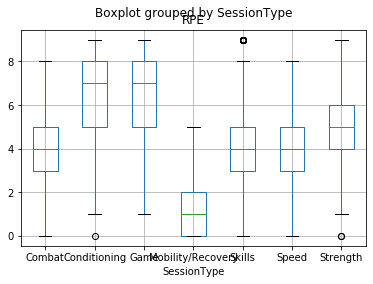

In [171]:
df.boxplot(column = 'RPE',by = 'SessionType')


In [172]:
pairwise_tukeyhsd(df["RPE"],df["SessionType"]).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Combat,Conditioning,2.1053,0.001,1.7308,2.4799,True
Combat,Game,2.0734,0.001,1.6666,2.4803,True
Combat,Mobility/Recovery,-3.1398,0.001,-3.5134,-2.7663,True
Combat,Skills,-0.1147,0.9,-0.4737,0.2444,False
Combat,Speed,-0.1785,0.7567,-0.5458,0.1888,False
Combat,Strength,0.8609,0.001,0.5023,1.2196,True
Conditioning,Game,-0.0319,0.9,-0.3006,0.2368,False
Conditioning,Mobility/Recovery,-5.2452,0.001,-5.4601,-5.0302,True
Conditioning,Skills,-2.22,0.001,-2.4087,-2.0313,True
Conditioning,Speed,-2.2839,0.001,-2.4878,-2.0799,True


Since most of groups have different mean for RPE, we can include that SessionType is highly correlated to RPE

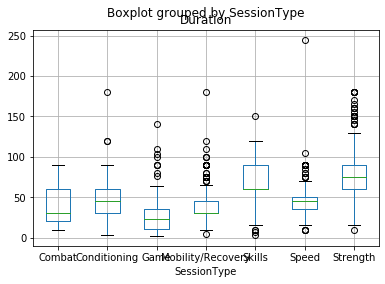

In [173]:
df.boxplot(column = 'Duration',by = 'SessionType')

In [174]:
pairwise_tukeyhsd(df["Duration"],df["SessionType"]).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Combat,Conditioning,8.3722,0.001,3.5202,13.2243,True
Combat,Game,-15.1214,0.001,-20.3913,-9.8514,True
Combat,Mobility/Recovery,-1.9051,0.9,-6.744,2.9339,False
Combat,Skills,26.6949,0.001,22.0433,31.3464,True
Combat,Speed,4.5808,0.0683,-0.1774,9.339,False
Combat,Strength,37.6885,0.001,33.0427,42.3343,True
Conditioning,Game,-23.4936,0.001,-26.9738,-20.0134,True
Conditioning,Mobility/Recovery,-10.2773,0.001,-13.062,-7.4926,True
Conditioning,Skills,18.3227,0.001,15.8781,20.7672,True
Conditioning,Speed,-3.7914,0.001,-6.4332,-1.1495,True


In [175]:

conditions = [
    (df['AcuteChronicRatio'] <= 0.8),
    (df['AcuteChronicRatio'] > 0.8) & (df['AcuteChronicRatio'] < 1.2),
    (df['AcuteChronicRatio'] >=1.2)]
choices = ['recovering', 'normal', 'high']
df["Load Status"] = np.select(conditions,choices)

In [176]:
df.groupby(df["Load Status"])["Load Status"].count()


Load Status
high          2560
normal        2561
recovering    2500
Name: Load Status, dtype: int64

In [177]:

df_part = df[["SessionType","Duration","RPE","AcuteChronicRatio","Load Status"]]
df_part.dropna()

df_part["status_factor"] = pd.factorize(df_part["Load Status"])[0]
df_part["type_factor"] = pd.factorize(df_part["SessionType"])[0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [178]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(36167.41867393689, 0.0)

In this Bartlett ’s test, the p-value is $1.0317176580752682\times 10^{-299}$. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [179]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model= calculate_kmo(df_part[["type_factor","Duration","RPE","AcuteChronicRatio","status_factor"]])
kmo_model

0.54011174812795

But in KMO test, it determines the adequacy for each observed variable and for the complete model. But our value is smaller than 0.6, which suggest inadequacy.

In [180]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer()
fa.analyze(df_part, 5, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.650942
1,1.283176
2,0.857828
3,0.701418
4,0.506636


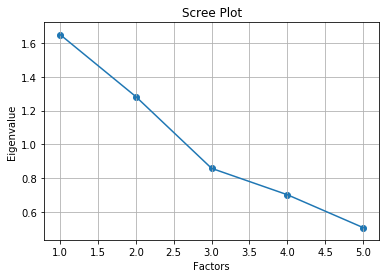

In [181]:
plt.scatter(range(1,5+1),ev)
plt.plot(range(1,5+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [182]:
fa = FactorAnalyzer()
fa.analyze(df_part, 2, rotation="varimax")
fa.loadings



,Factor1,Factor2
Duration,0.087621,0.355879
RPE,-0.009533,0.718505
AcuteChronicRatio,0.993340,0.103320
status_factor,0.469264,0.075866
type_factor,0.061483,0.382531


In [184]:
df_part = df_part[["Duration","RPE","AcuteChronicRatio","status_factor","type_factor"]]
df_part

,Duration,RPE,AcuteChronicRatio,status_factor,type_factor
0,5.0,0.0,1.07,0,0
1,29.0,7.0,1.07,0,1
2,27.0,9.0,1.07,0,1
3,36.0,6.0,0.74,1,1
4,36.0,8.0,0.74,1,1
5,15.0,2.0,0.74,1,0
6,27.0,6.0,0.90,0,1
7,24.0,6.0,0.90,0,1
8,10.0,0.0,0.90,0,0
9,60.0,3.0,0.63,1,2


In [185]:
new_df = pd.DataFrame(np.dot(df_part,fa.loadings))

In [198]:
len(new_df)


7621

In [199]:
len(df)

7621

In [203]:
data = {"Date":df["Date"].tolist(),"PlayerID":df["PlayerID"].tolist(),
        "Training":df["Training"].tolist(),"FactorRatio":new_df[0].tolist(),"FactorRPE":new_df[1].tolist()}

In [204]:
dfRPE = pd.DataFrame(data)
dfRPE

,Date,PlayerID,Training,FactorRatio,FactorRPE
0,2018-07-21,13,Yes,1.500979,1.889948
1,2018-07-21,13,Yes,3.598637,15.843117
2,2018-07-21,13,Yes,3.404329,16.568369
3,2018-07-20,11,Yes,4.362979,17.657537
4,2018-07-20,11,Yes,4.343913,19.094547
5,2018-07-20,11,Yes,2.499585,6.927521
6,2018-07-20,13,Yes,3.264060,14.395289
7,2018-07-20,13,Yes,3.001197,13.327651
8,2018-07-20,13,Yes,1.770216,3.651780
9,2018-07-19,1,Yes,6.446697,24.414287


In [205]:
dfRPE.to_csv("~/Desktop/RPEdata.csv")

In [202]:
df

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself,Load Status
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all,normal
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all,normal
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all,normal
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely,recovering
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely,recovering
5,2018-07-20,11,Yes,Mobility/Recovery,15.0,2.0,30.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely,recovering
6,2018-07-20,13,Yes,Game,27.0,6.0,162.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all,normal
7,2018-07-20,13,Yes,Game,24.0,6.0,144.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all,normal
8,2018-07-20,13,Yes,Mobility/Recovery,10.0,0.0,0.0,306.0,259.4,287.32,0.90,NaN,NaN,Not at all,normal
9,2018-07-19,1,Yes,Skills,60.0,3.0,180.0,180.0,87.9,140.54,0.63,NaN,NaN,NaN,recovering


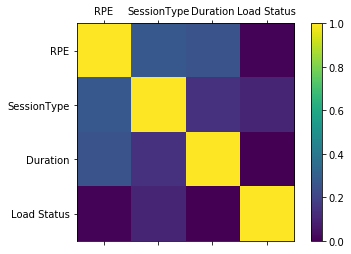

In [30]:
correlations = new_df.corr()
# plot correlation matrix
names = ["RPE","SessionType","Duration","Load Status"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [ ]:
df["RPE"].plot(kind='bar')
plt.show()

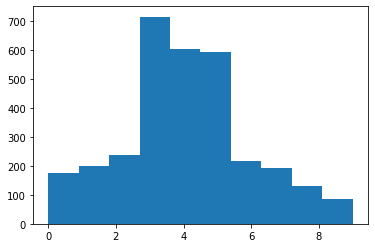

In [99]:
a = plt.hist(df["RPE"],bins = 10)
plt.show()

ValueError: could not convert string to float: 'Mobility/Recovery'

array([[0.        , 0.02362113, 0.02362113, ..., 0.00787371, 0.01968428,
        0.00787371]])

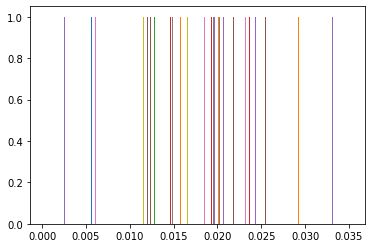